# Pride Corporate Accountability Project

The data this week comes from [Data For Progress.](https://www.dataforprogress.org/accountable-allies)

Each year, hundreds of corporations around the country participate in Pride, an annual celebration of the LGBTQ+ community’s history and progress. They present themselves as LGBTQ+ allies, but new research from Data for Progress finds that in between their yearly parade appearances, dozens of these corporations are giving to state politicians behind some of the most bigoted and harmful policies in over a decade.

Activists and allies wishing to hold these politicians accountable for bigotry can begin by holding their corporate backers accountable. In a new project series, Data for Progress has compiled a set of resources for activists, employees, community leaders, and lawmakers to push back on these policies and the prejudice powering them. We provide research tying the political giving of specific Fortune 500 companies to anti-LGBTQ+ politicians in six states, polling showing that such giving hurts the brands’ favorability, and upcoming policy memos to understand the issue and to take action

In [1]:
library(tidyverse)
library(paletteer)
library(showtext)
library(patchwork)
library(tidytext)
library(reshape2)
library(ggrepel)
library(ggtext)
library(lubridate)
library(janitor)
library(treemapify)


library(repr)
options(repr.plot.width = 20, repr.plot.height =20)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: sysfonts

Loading required package: showtextdb


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




In [2]:
annotate <- ggplot2::annotate

In [3]:
font_add_google('Fira Sans', 'firasans')
showtext_auto()

In [4]:
my_theme <- function() {
  
  # Colors
  color.background = "#FFF5EE"
  color.text = "#030303"
  
  # Begin construction of chart
  theme_bw(base_size=15) +
    
    # Format background colors
    theme(panel.background = element_rect(fill=color.background, color=color.background)) +
    theme(plot.background  = element_rect(fill=color.background, color=color.background)) +
    theme(panel.border     = element_rect(color=color.background)) +
    theme(strip.background = element_rect(fill=color.background, color=color.background)) +
    
    # Format the grid
    theme(panel.grid.major.y = element_blank()) +
    theme(panel.grid.minor.y = element_blank()) +
    theme(panel.grid.major.x = element_blank())+
    theme(panel.grid.minor.x = element_blank()) +
    theme(axis.ticks       = element_blank()) +
    
    # Format the legend
    theme(legend.position = "none") +
    theme(legend.background = element_rect(fill=color.background, color=color.background))+
    theme(legend.text = element_text(size = 15, face = "bold", color=color.text))+
    theme(legend.justification = "center")+
    theme(legend.title = element_text(family = "firasans",
                                    color = "#030303",
                                    size = 15, face = "bold"))+
    
    # Format title and axis labels
    theme(plot.title       = element_text(color=color.text, size=40, face = "bold", hjust = 0.5, family = 'firasans'))+
    theme(plot.subtitle    = element_text(color=color.text, size=30, face = "bold", hjust = 0.5, family = 'firasans'))+
    theme(plot.caption     = element_text(color=color.text, size=20, face = "bold", hjust = 0.5, family = 'firasans'))+
    theme(axis.title.x     = element_text(size=20, color = color.text, hjust = 0.5, vjust = 0.5,face = "bold", family = 'firasans')) +
    theme(axis.title.y     = element_text(size=20, color = color.text, hjust = 0.5, vjust = 0.5,face = "bold", family = 'firasans')) +
    theme(axis.text.x      = element_text(size=25, color = color.text, hjust = 0.5, vjust = 0.5,face = "bold", family = 'firasans')) +
    theme(axis.text.y      = element_text(size=25, color = color.text, face = "bold", family = 'firasans')) +
    theme(strip.text       = element_text(size=25, color = color.text, hjust = 0.5, vjust = 0.5,face = "bold", family = 'firasans')) +
    
     # Plot margins
    theme(plot.margin = unit(c(0.35, 0.2, 0.3, 0.35), "cm"))
}

# Reading the Data Files

In [5]:
pride_aggregates <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-06-07/pride_aggregates.csv')
fortune_aggregates <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-06-07/fortune_aggregates.csv')
corp <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-06-07/corp_by_politician.csv')

Rows: 31 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Company
dbl (3): Total Contributed, # of Politicians Contributed to, # of States Whe...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 117 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Company
dbl (3): Total Contributed, # of Politicians Contributed to, # of States Whe...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 103 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): Politician, Title, State
dbl (1): SUM of Amount

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the co

# Pride aggregates

**Pride sponsors who have donated to Anti-LQBTQ Campaigns**

In [6]:
head(pride_aggregates)

Company,Total Contributed,# of Politicians Contributed to,# of States Where Contributions Made
<chr>,<dbl>,<dbl>,<dbl>
Toyota,601500.0,7,3
AT&T,307137.5,67,6
Comcast,121350.0,40,4
Amazon,87900.0,17,1
FedEx,79700.0,24,2
State Farm,79550.0,32,3


In [7]:
pride_aggregates <- clean_names(pride_aggregates)
head(pride_aggregates)

company,total_contributed,number_of_politicians_contributed_to,number_of_states_where_contributions_made
<chr>,<dbl>,<dbl>,<dbl>
Toyota,601500.0,7,3
AT&T,307137.5,67,6
Comcast,121350.0,40,4
Amazon,87900.0,17,1
FedEx,79700.0,24,2
State Farm,79550.0,32,3


## Circular Bar chart

In [8]:
df <- pride_aggregates %>%
subset(company != "Grand Total")%>%
mutate(company = fct_reorder(company, total_contributed))
df

company,total_contributed,number_of_politicians_contributed_to,number_of_states_where_contributions_made
<fct>,<dbl>,<dbl>,<dbl>
Toyota,601500.00,7,3
AT&T,307137.52,67,6
Comcast,121350.00,40,4
Amazon,87900.00,17,1
FedEx,79700.00,24,2
State Farm,79550.00,32,3
General Motors,48500.00,10,4
Budweiser,45250.00,24,4
Enterprise,41300.00,30,6


Warning message:
“position_stack requires non-overlapping x intervals”


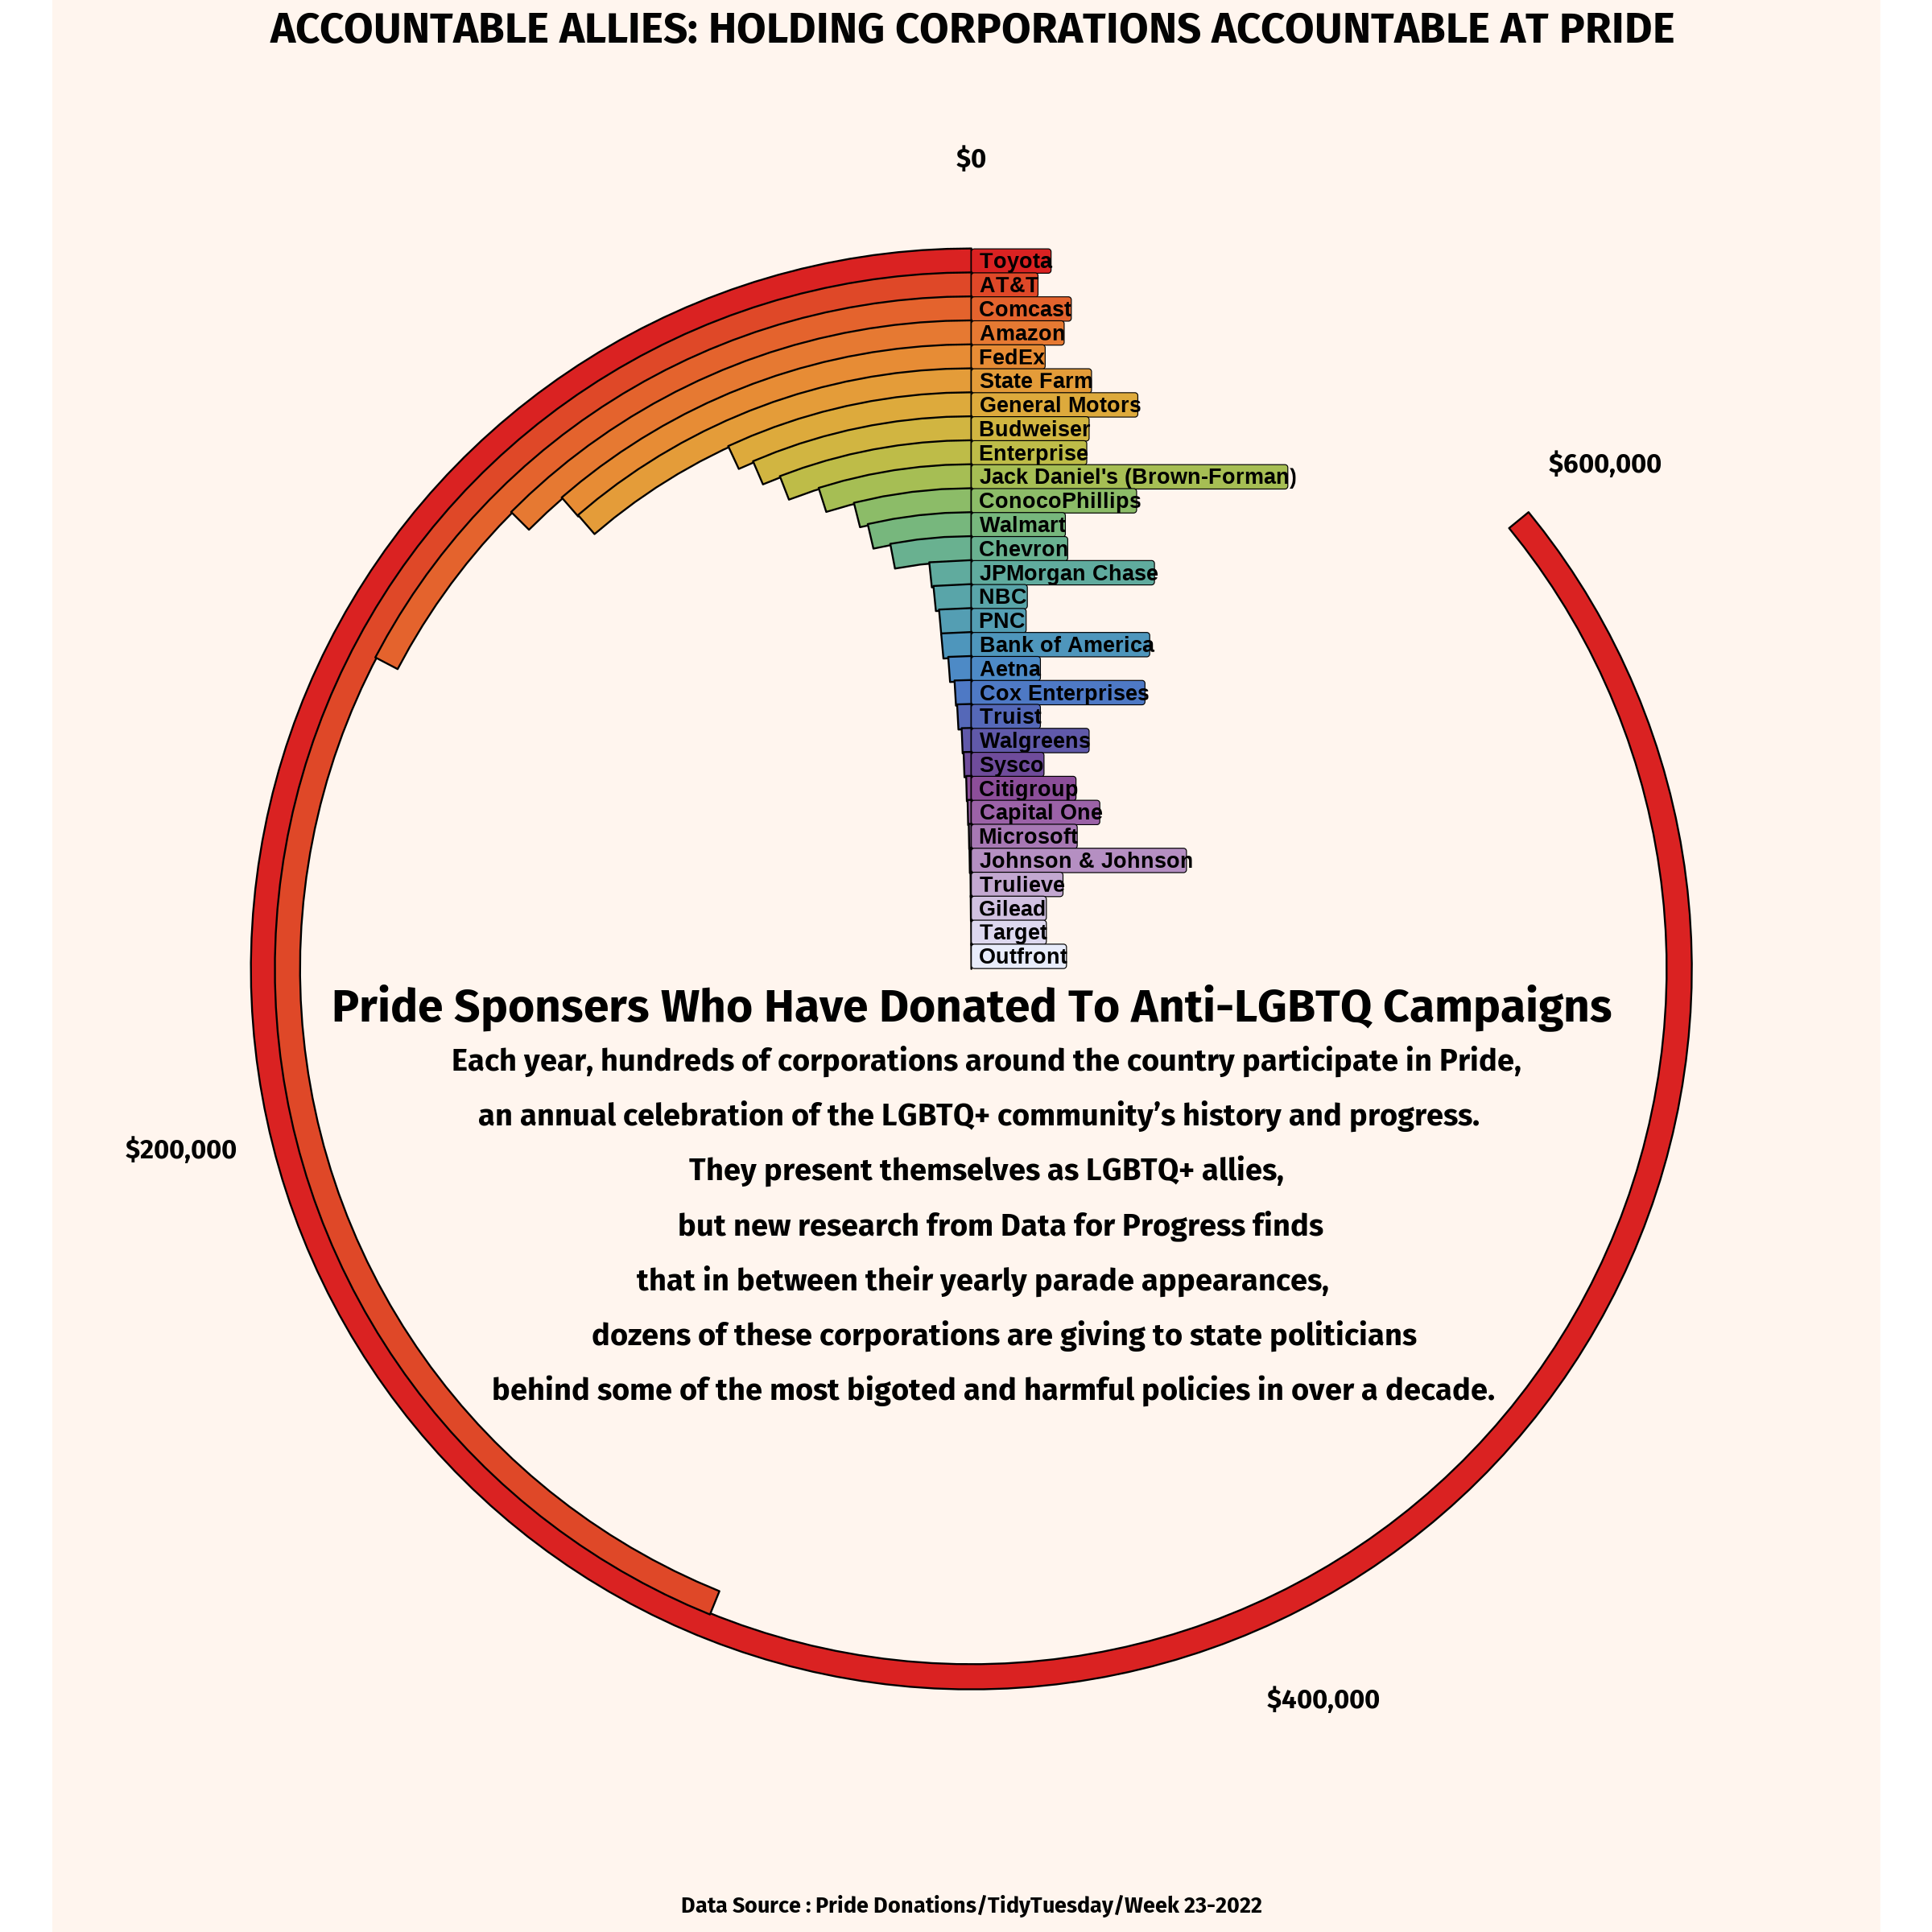

In [9]:
p1 <- ggplot(df, aes(total_contributed, company,fill = company))+
geom_col(width = 1.05, color = 'black')+
scale_x_continuous(limits = c(0,700000),
                  labels = scales::dollar)+
geom_label(aes(label = company,x=0),size = 7, fontface = 'bold', vjust = 0.5, hjust = 0)+
scale_fill_paletteer_d("khroma::smooth_rainbow")+
scale_color_paletteer_d("khroma::smooth_rainbow")+
annotate("text", x = 350000, y = 2, label = "Pride Sponsers Who Have Donated To Anti-LGBTQ Campaigns ", size = 15, family = 'firasans', fontface = 'bold')+
annotate("text", x = 350000, y = 10, label = "    \n    Each year, hundreds of corporations around the country participate in Pride,   \n  an annual celebration of the LGBTQ+ community’s history and progress.     \n    They present themselves as LGBTQ+ allies,          \n        but new research from Data for Progress finds        \n   that in between their yearly parade appearances,           \n         dozens of these corporations are giving to state politicians        \n      behind some of the most bigoted and harmful policies in over a decade.", size = 10, family = 'firasans', fontface = 'bold')+
my_theme()+
labs(title = "ACCOUNTABLE ALLIES: HOLDING CORPORATIONS ACCOUNTABLE AT PRIDE",
    caption = "Data Source : Pride Donations/TidyTuesday/Week 23-2022")+
theme(legend.position = 'none')+
theme(axis.text.y = element_blank())+
theme(axis.title.x = element_blank())+
theme(axis.title.y = element_blank())+
coord_polar(clip = "off", direction = -1)
p1

# Number of politicians Contributed to

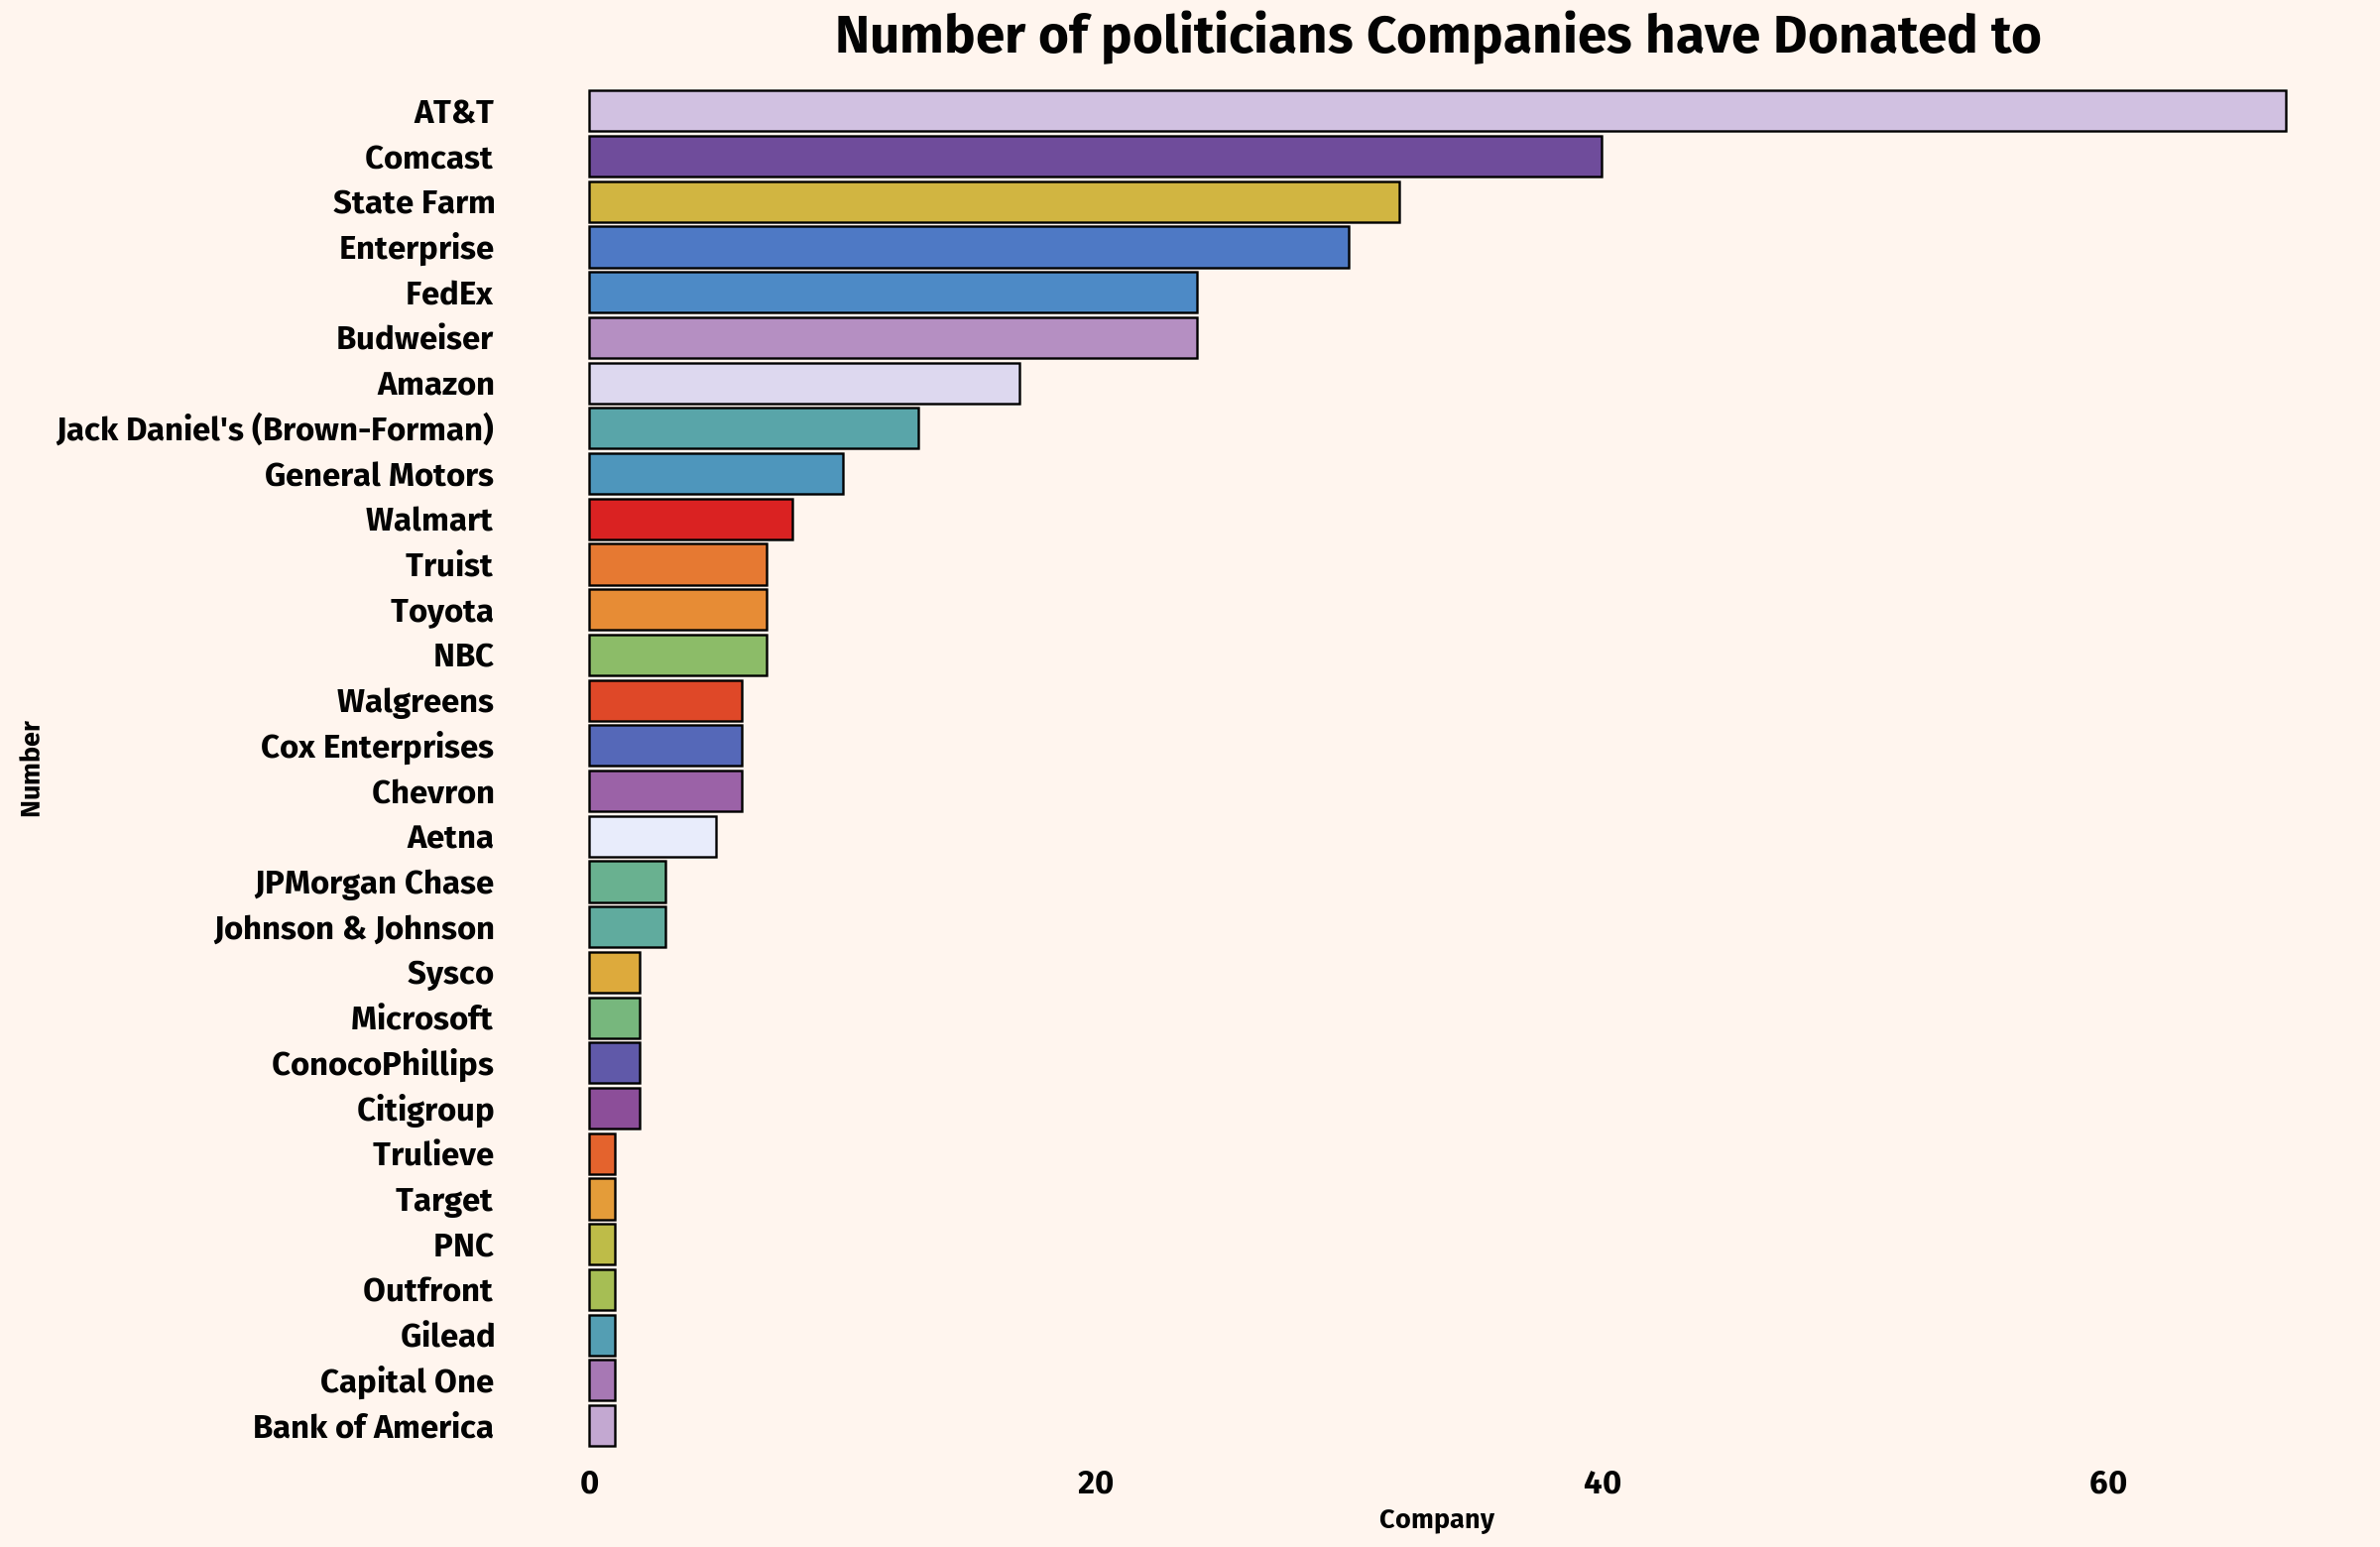

In [10]:
options(repr.plot.width = 20, repr.plot.height =13)

no_of_politicins <- pride_aggregates %>%
subset(company != "Grand Total")%>%
ggplot(aes(fct_reorder(company, number_of_politicians_contributed_to),number_of_politicians_contributed_to, fill = company))+
geom_col(color = 'black')+
scale_fill_paletteer_d("khroma::smooth_rainbow")+
coord_flip()+
my_theme()+
labs(title = 'Number of politicians Companies have Donated to',
    x = 'Number',
    y = 'Company')
no_of_politicins

# Fortune Aggregates
**Fortune 500, Pride sponsors who have donated to Anti-LQBTQ Campaigns**

In [11]:
head(fortune_aggregates)

Company,Total Contributed,# of Politicians Contributed to,# of States Where Contributions Made
<chr>,<dbl>,<dbl>,<dbl>
AT&T,307137.5,67,6
Charter Communications,168077.1,34,5
Enterprise Products Partners,160000.0,1,1
Comcast,121350.0,40,4
Berkshire Hathaway,100000.0,1,1
Valero Energy,93500.0,6,2


In [12]:
fortune_aggregates <- clean_names(fortune_aggregates)
head(fortune_aggregates)

company,total_contributed,number_of_politicians_contributed_to,number_of_states_where_contributions_made
<chr>,<dbl>,<dbl>,<dbl>
AT&T,307137.5,67,6
Charter Communications,168077.1,34,5
Enterprise Products Partners,160000.0,1,1
Comcast,121350.0,40,4
Berkshire Hathaway,100000.0,1,1
Valero Energy,93500.0,6,2


In [13]:
df1 <- fortune_aggregates %>%
subset(company != "Grand Total")%>%
mutate(company = fct_reorder(company, total_contributed))%>%
head(30)

Warning message:
“position_stack requires non-overlapping x intervals”


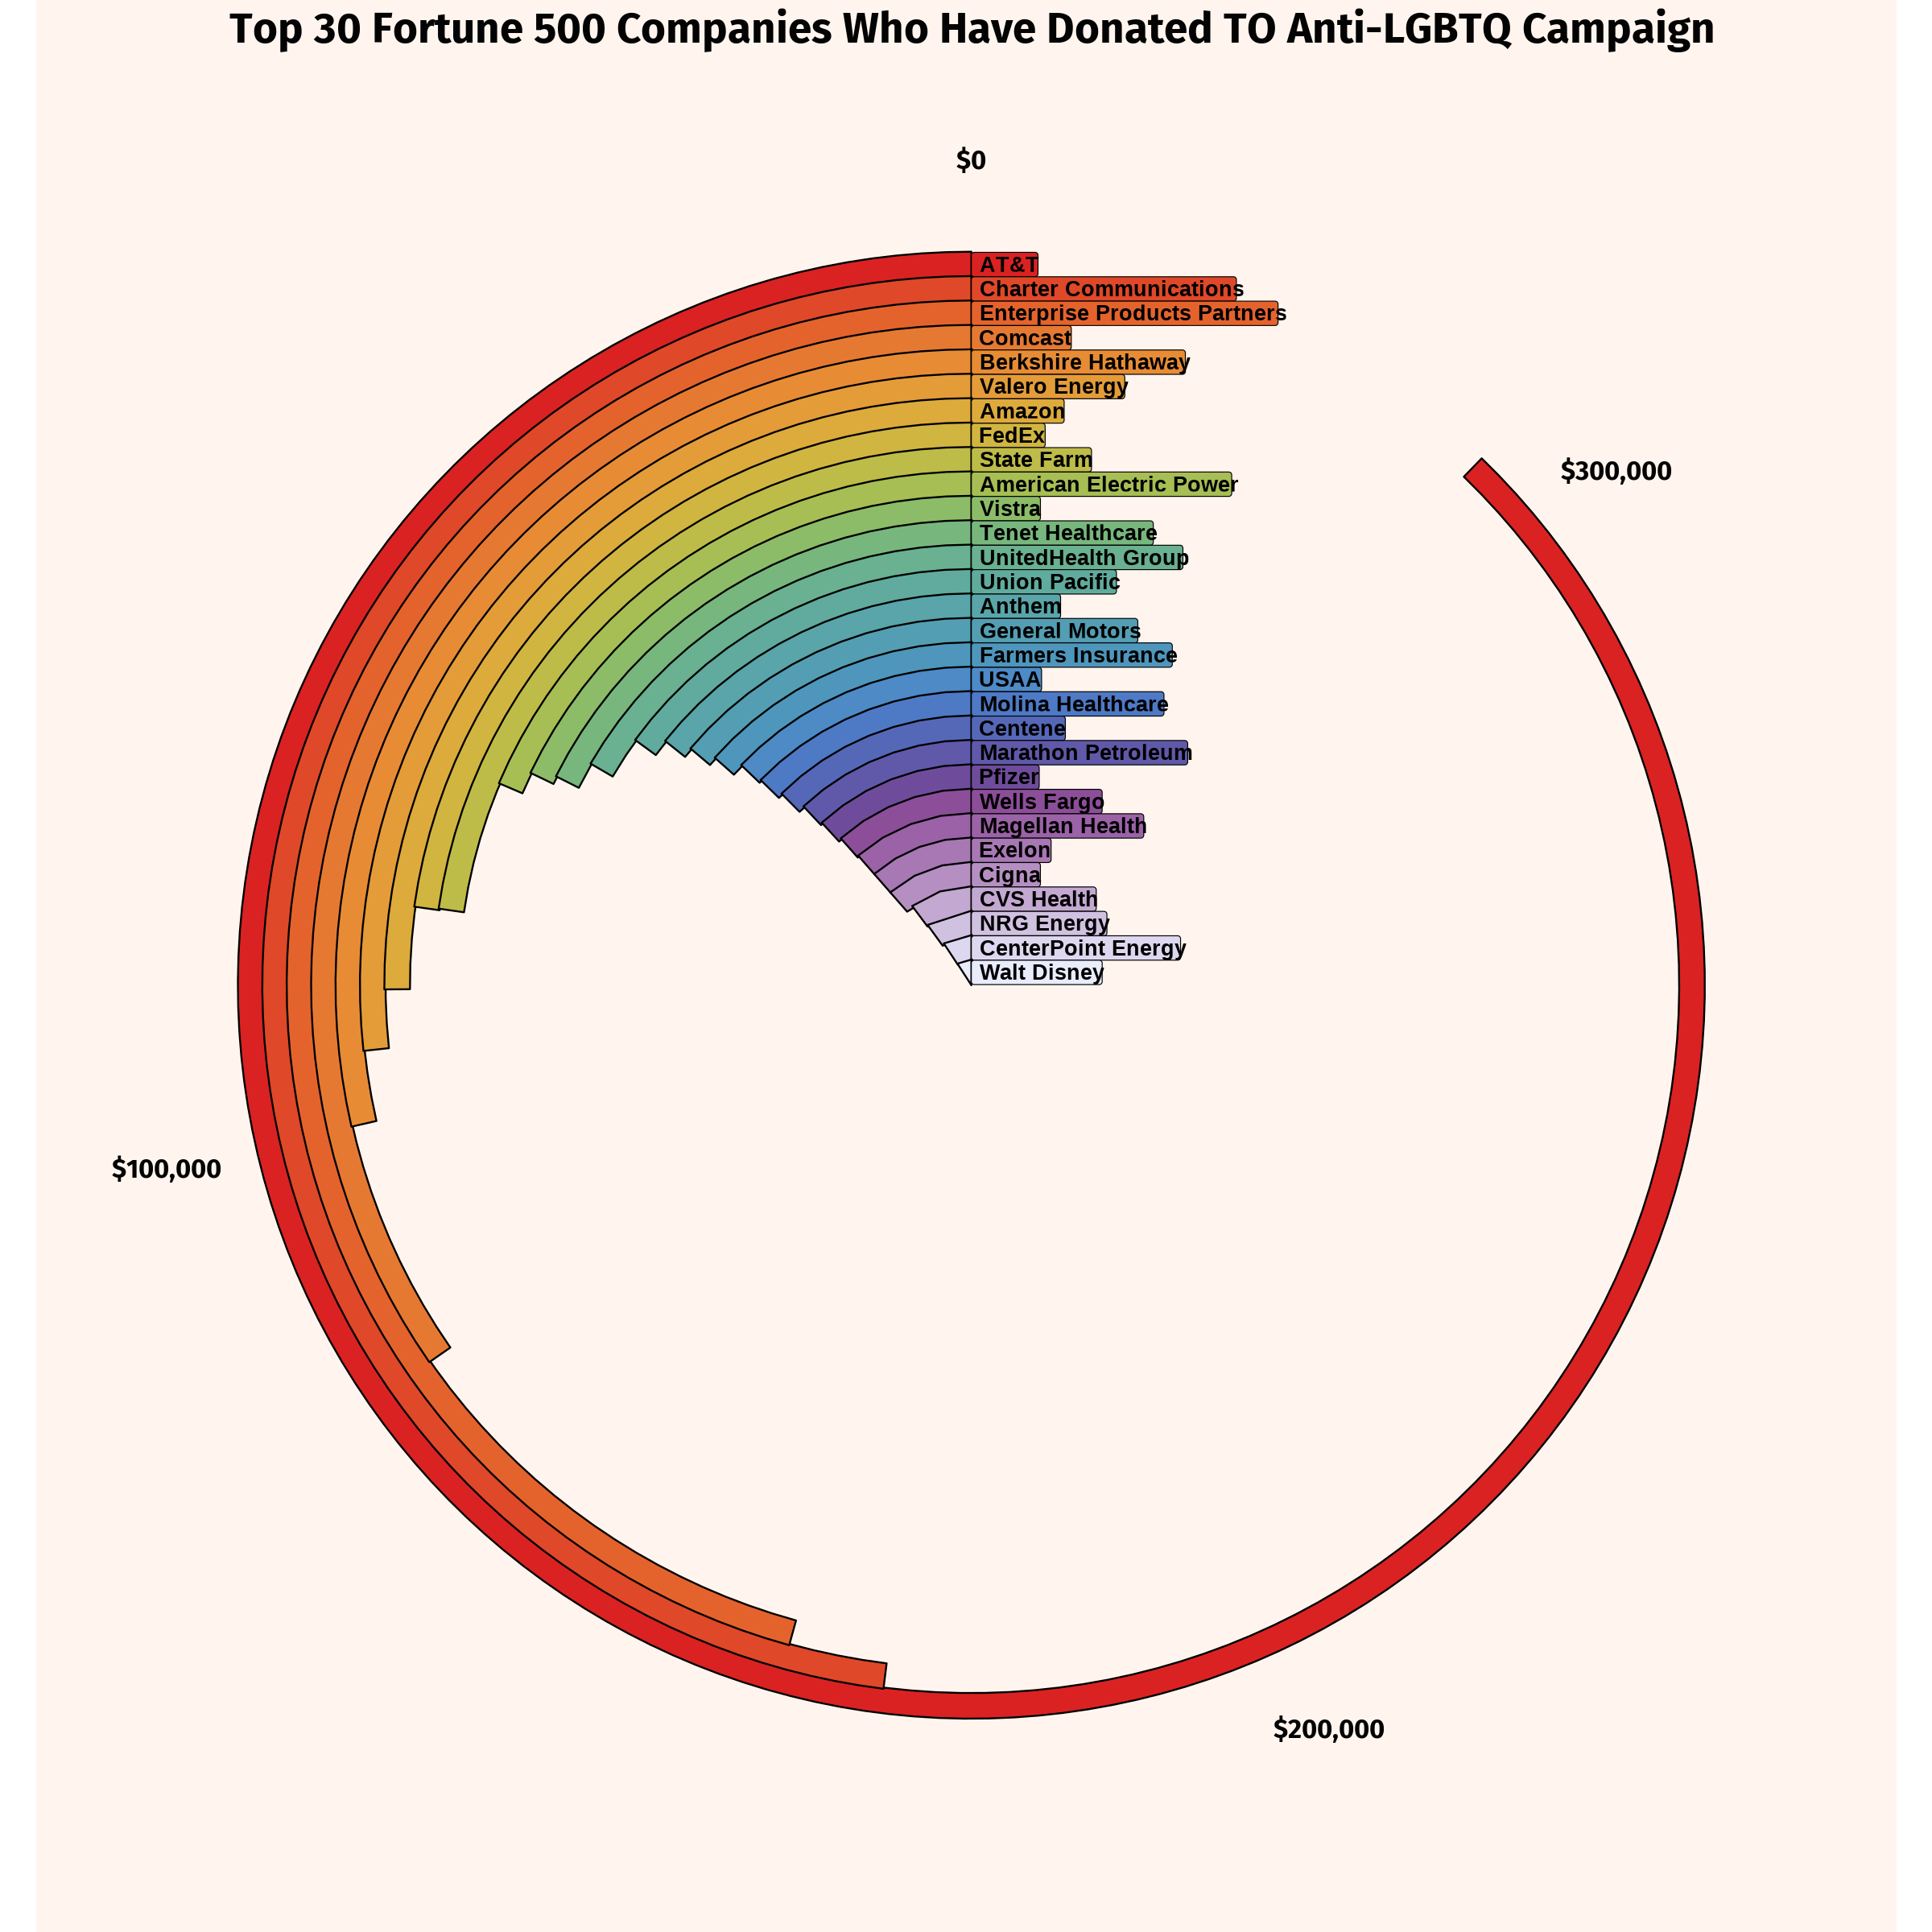

In [22]:
options(repr.plot.width = 20, repr.plot.height =20)

p2 <- ggplot(df1, aes(total_contributed, company,fill = company))+
geom_col(width = 1.05, color = 'black')+
scale_x_continuous(limits = c(0,350000),
                  labels = scales::dollar)+
geom_label(aes(label = company,x=0),size = 7, fontface = 'bold', vjust = 0.5, hjust = 0)+
scale_fill_paletteer_d("khroma::smooth_rainbow")+
scale_color_paletteer_d("khroma::smooth_rainbow")+
my_theme()+
labs(title = "Top 30 Fortune 500 Companies Who Have Donated TO Anti-LGBTQ Campaign")+
theme(legend.position = 'none')+
theme(axis.text.y = element_blank())+
theme(axis.title.x = element_blank())+
theme(axis.title.y = element_blank())+
coord_polar(clip = "off", direction = -1)
p2

# Corporation by Politician

In [15]:
head(corp)

Politician,SUM of Amount,Title,State
<chr>,<dbl>,<chr>,<chr>
Greg Abbott,2219301.0,Governor,TX
Kay Ivey,302537.5,Governor,AL
Ken Paxton,192500.7,Attorney General,TX
Bill Lee,99250.0,Governor,TN
Cameron Sexton,77600.0,Speaker,TN
William Lamberth,48250.0,Republican Leader,TN


In [16]:
corp <- clean_names(corp)
head(corp)

politician,sum_of_amount,title,state
<chr>,<dbl>,<chr>,<chr>
Greg Abbott,2219301.0,Governor,TX
Kay Ivey,302537.5,Governor,AL
Ken Paxton,192500.7,Attorney General,TX
Bill Lee,99250.0,Governor,TN
Cameron Sexton,77600.0,Speaker,TN
William Lamberth,48250.0,Republican Leader,TN


# Title of the Politicians

In [17]:
corp_title <- corp %>%
filter(!title ==  '#N/A')%>%
count(title, sort = TRUE)

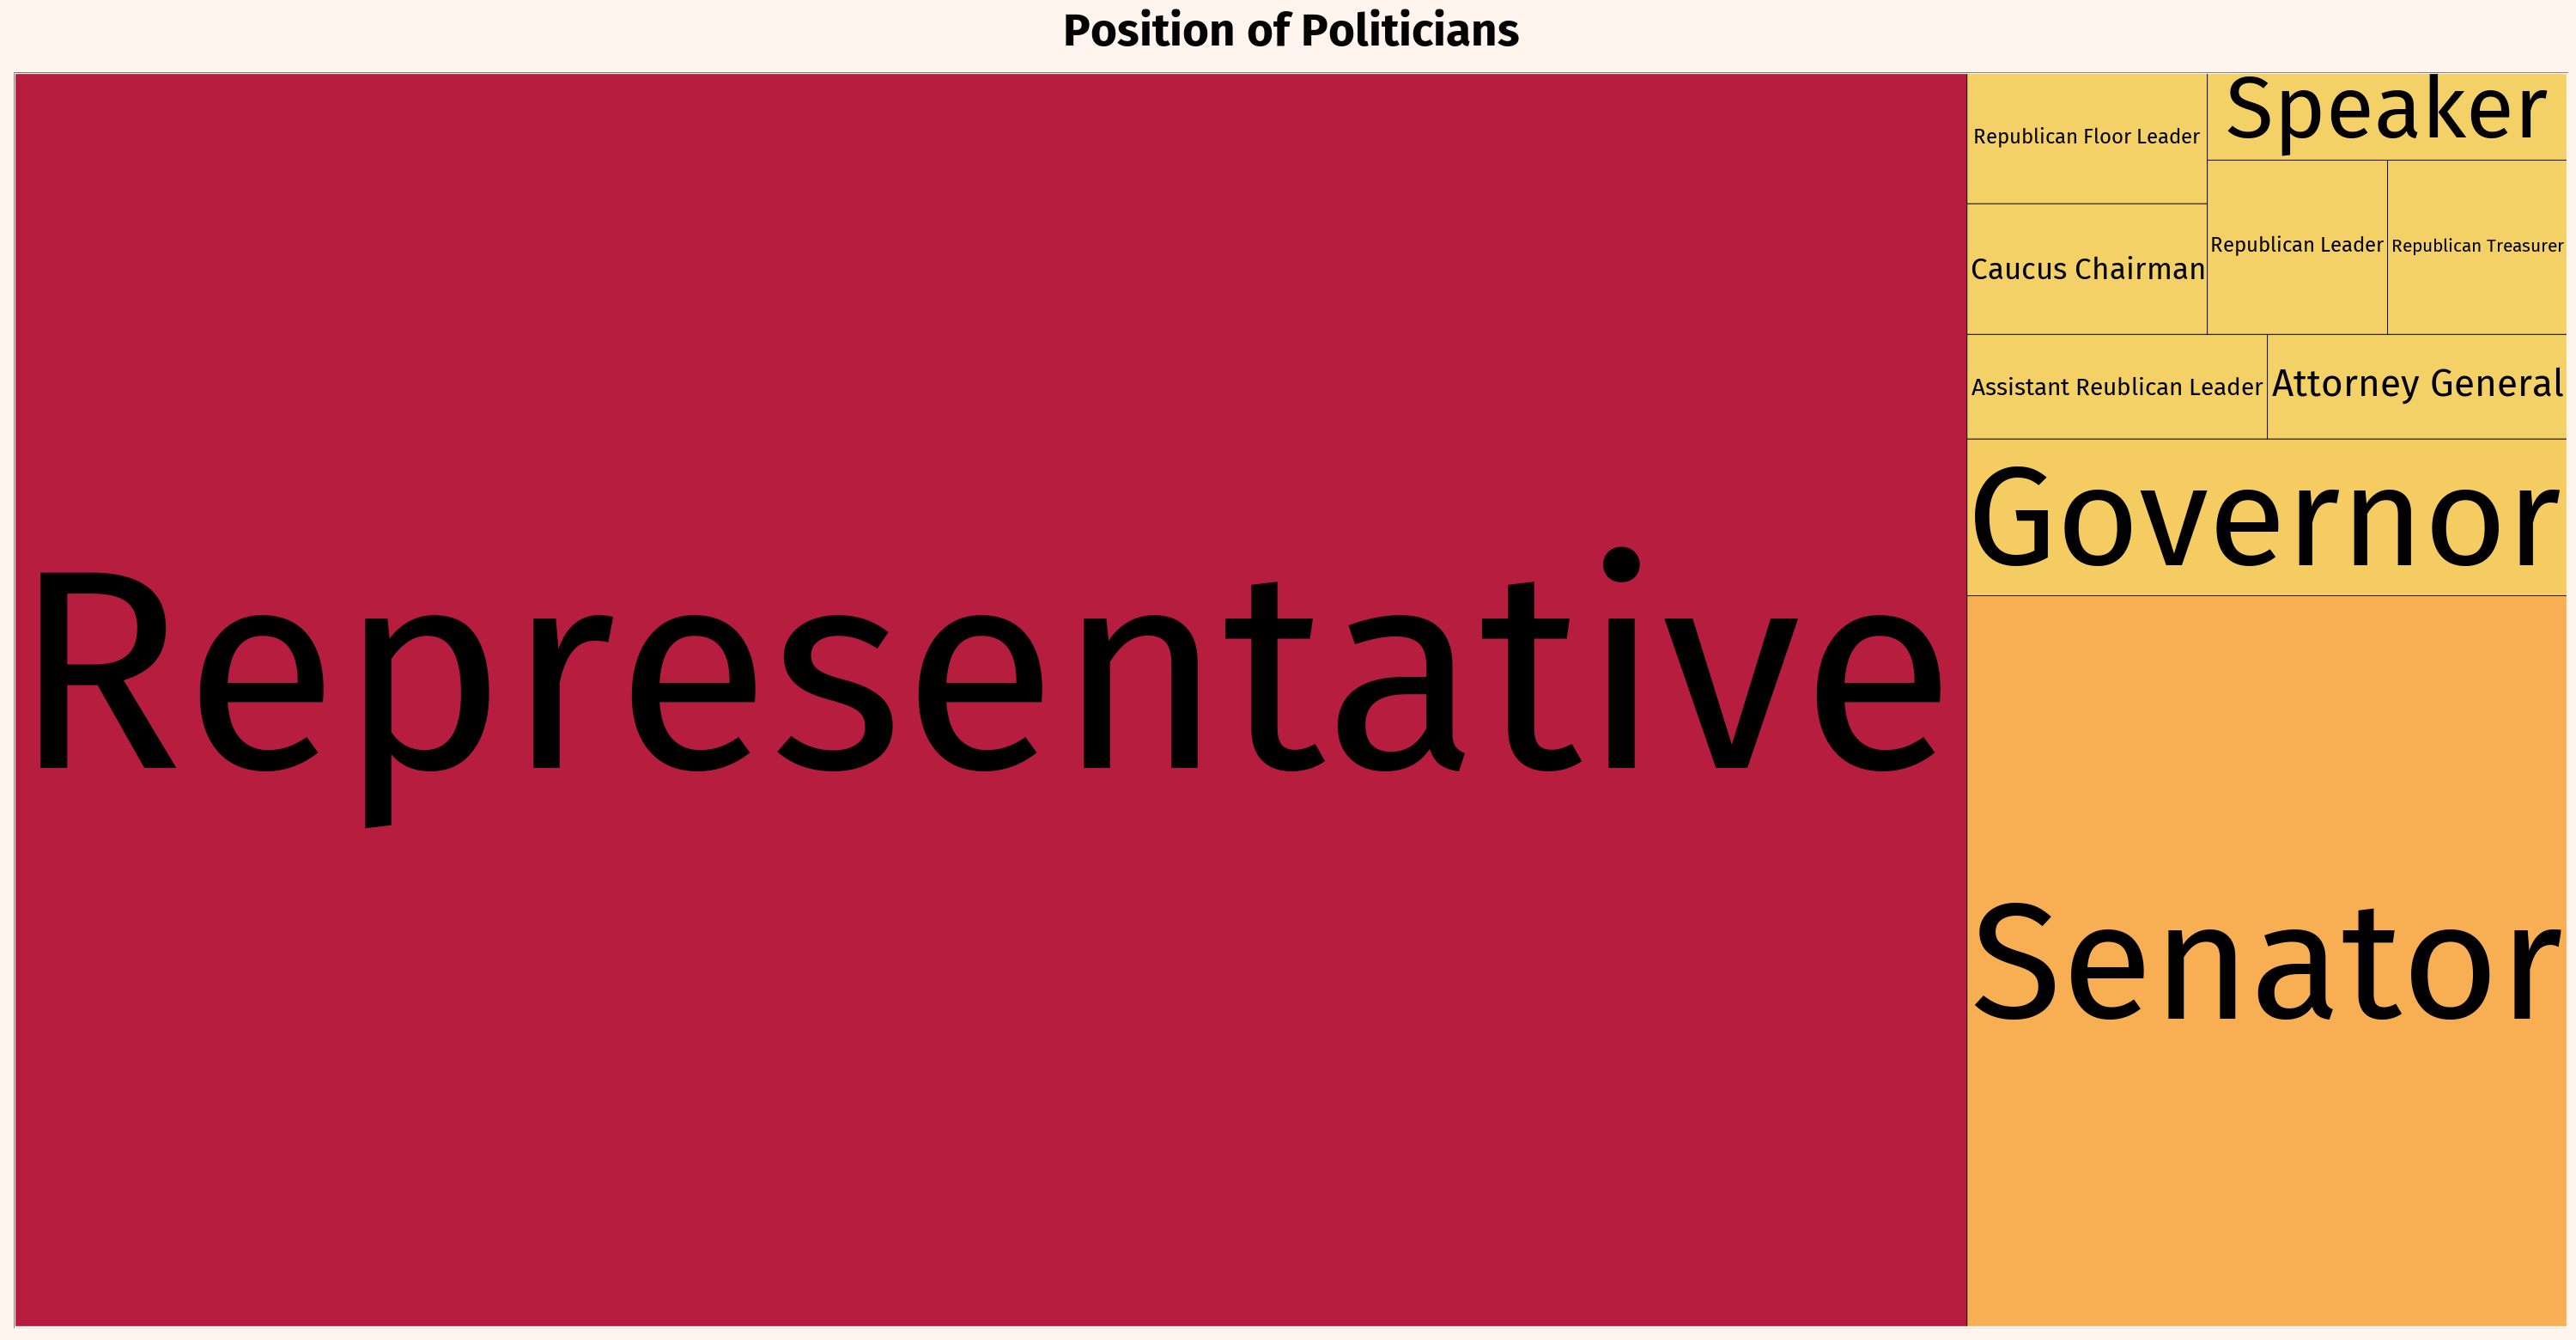

In [18]:
options(repr.plot.width = 25, repr.plot.height =13)

p <- ggplot(corp_title, aes(area = n, fill = n, label = title)) +
  geom_treemap(colour = "black", alpha = 1.2) +
  geom_treemap_text(colour = "black",
                    place = "centre",
                    size = 8,
                    family = "firasans",
                    grow = TRUE) +
  scale_fill_paletteer_c("ggthemes::Red-Gold")+
my_theme()+
labs(title = "Position of Politicians")
p

# Amount Donated According to Politicians Titles

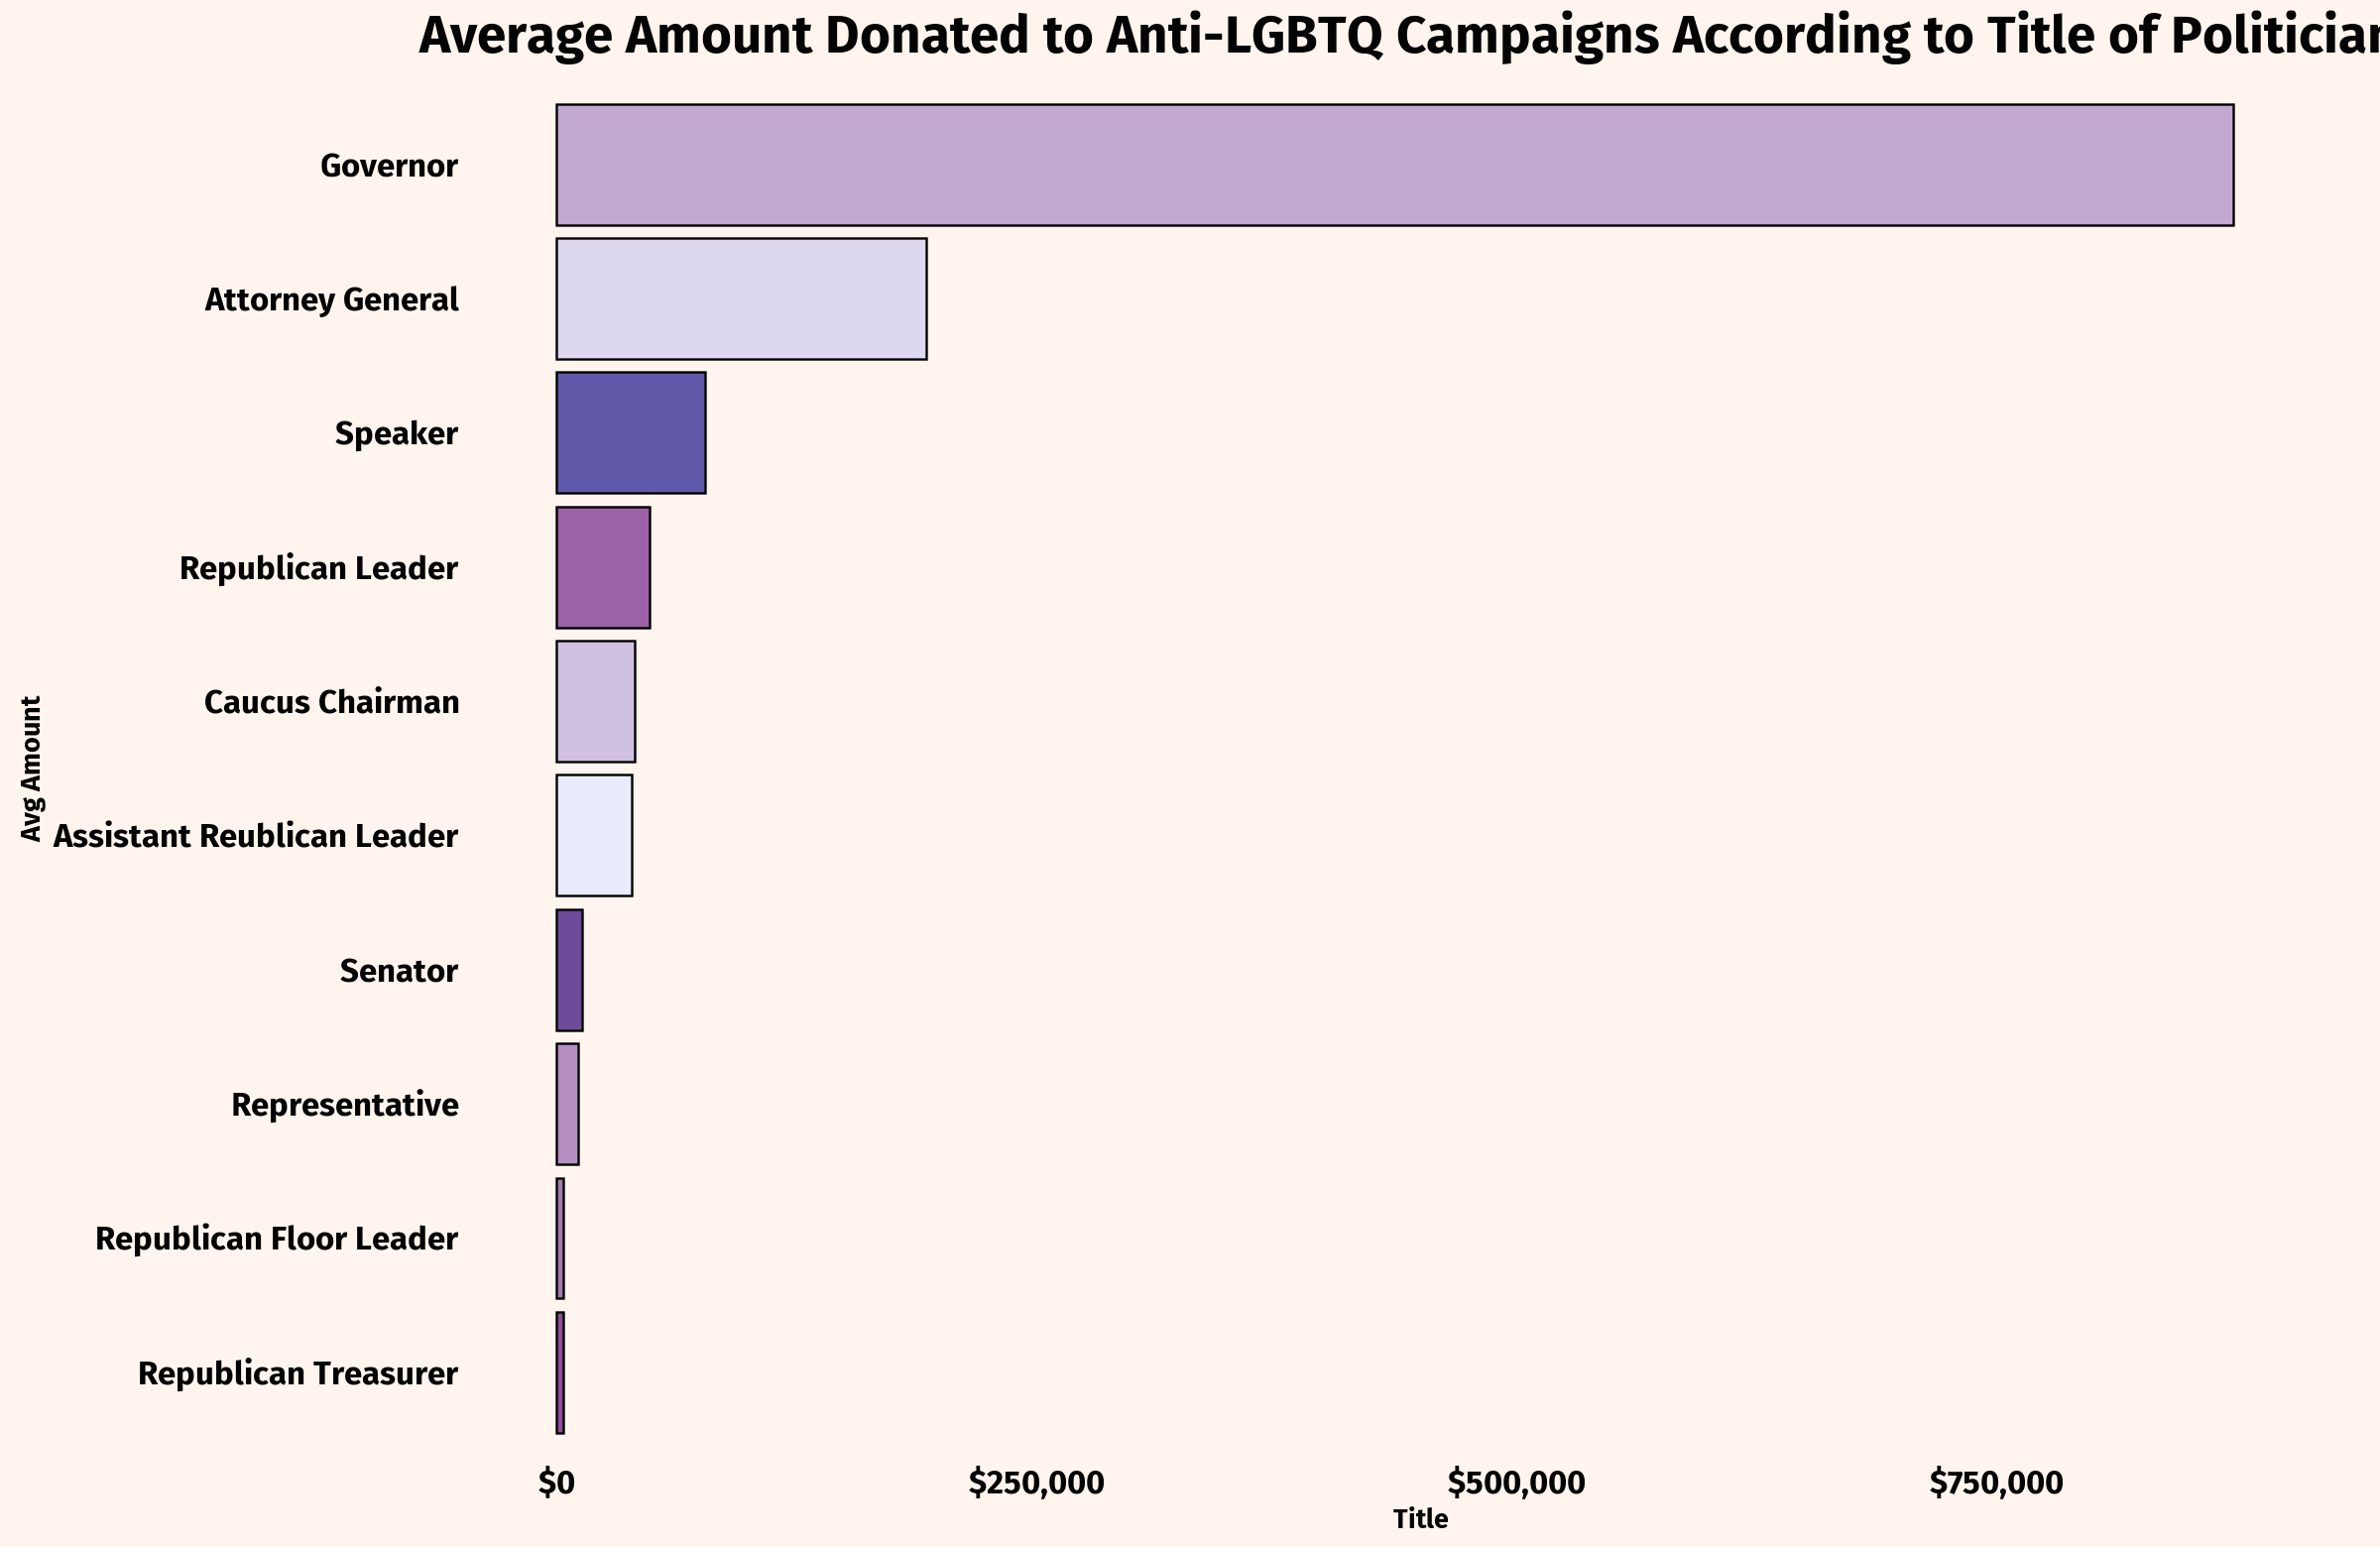

In [23]:
options(repr.plot.width = 20, repr.plot.height =13)

corp %>%
filter(! title == '#N/A')%>%
group_by(title)%>%
summarise(avg_amount = mean(sum_of_amount))%>%
ggplot(aes(reorder(title, avg_amount), avg_amount, fill = title))+
geom_col(color = 'black')+
coord_flip()+
scale_fill_paletteer_d("khroma::smooth_rainbow")+
scale_y_continuous(limits = c(0,900000),
                  labels = scales::dollar)+
my_theme()+
labs(title = "Average Amount Donated to Anti-LGBTQ Campaigns According to Title of Politicians",
    x = 'Avg Amount',
    y = 'Title')

# Amount Donated According to States

In [24]:
corp %>%
filter(! state == '#N/A')%>%
mutate(state = case_when(state == 'AL' ~ 'Alabama',
                         state == 'AZ' ~ 'Arizona',
                         state == 'FL' ~ 'Florida',
                         state == 'ID' ~ "Idaho",
                         state == 'TN' ~ 'Tenese',
                         state == 'TX' ~ 'Texas'))%>%
group_by(state)%>%
summarise(avg_amount = mean(sum_of_amount))%>%
arrange(desc(avg_amount))

state,avg_amount
<chr>,<dbl>
Texas,1205900.820
Florida,22680.852
Tenese,20415.152
Alabama,16084.546
Arizona,7522.222
Idaho,1850.000


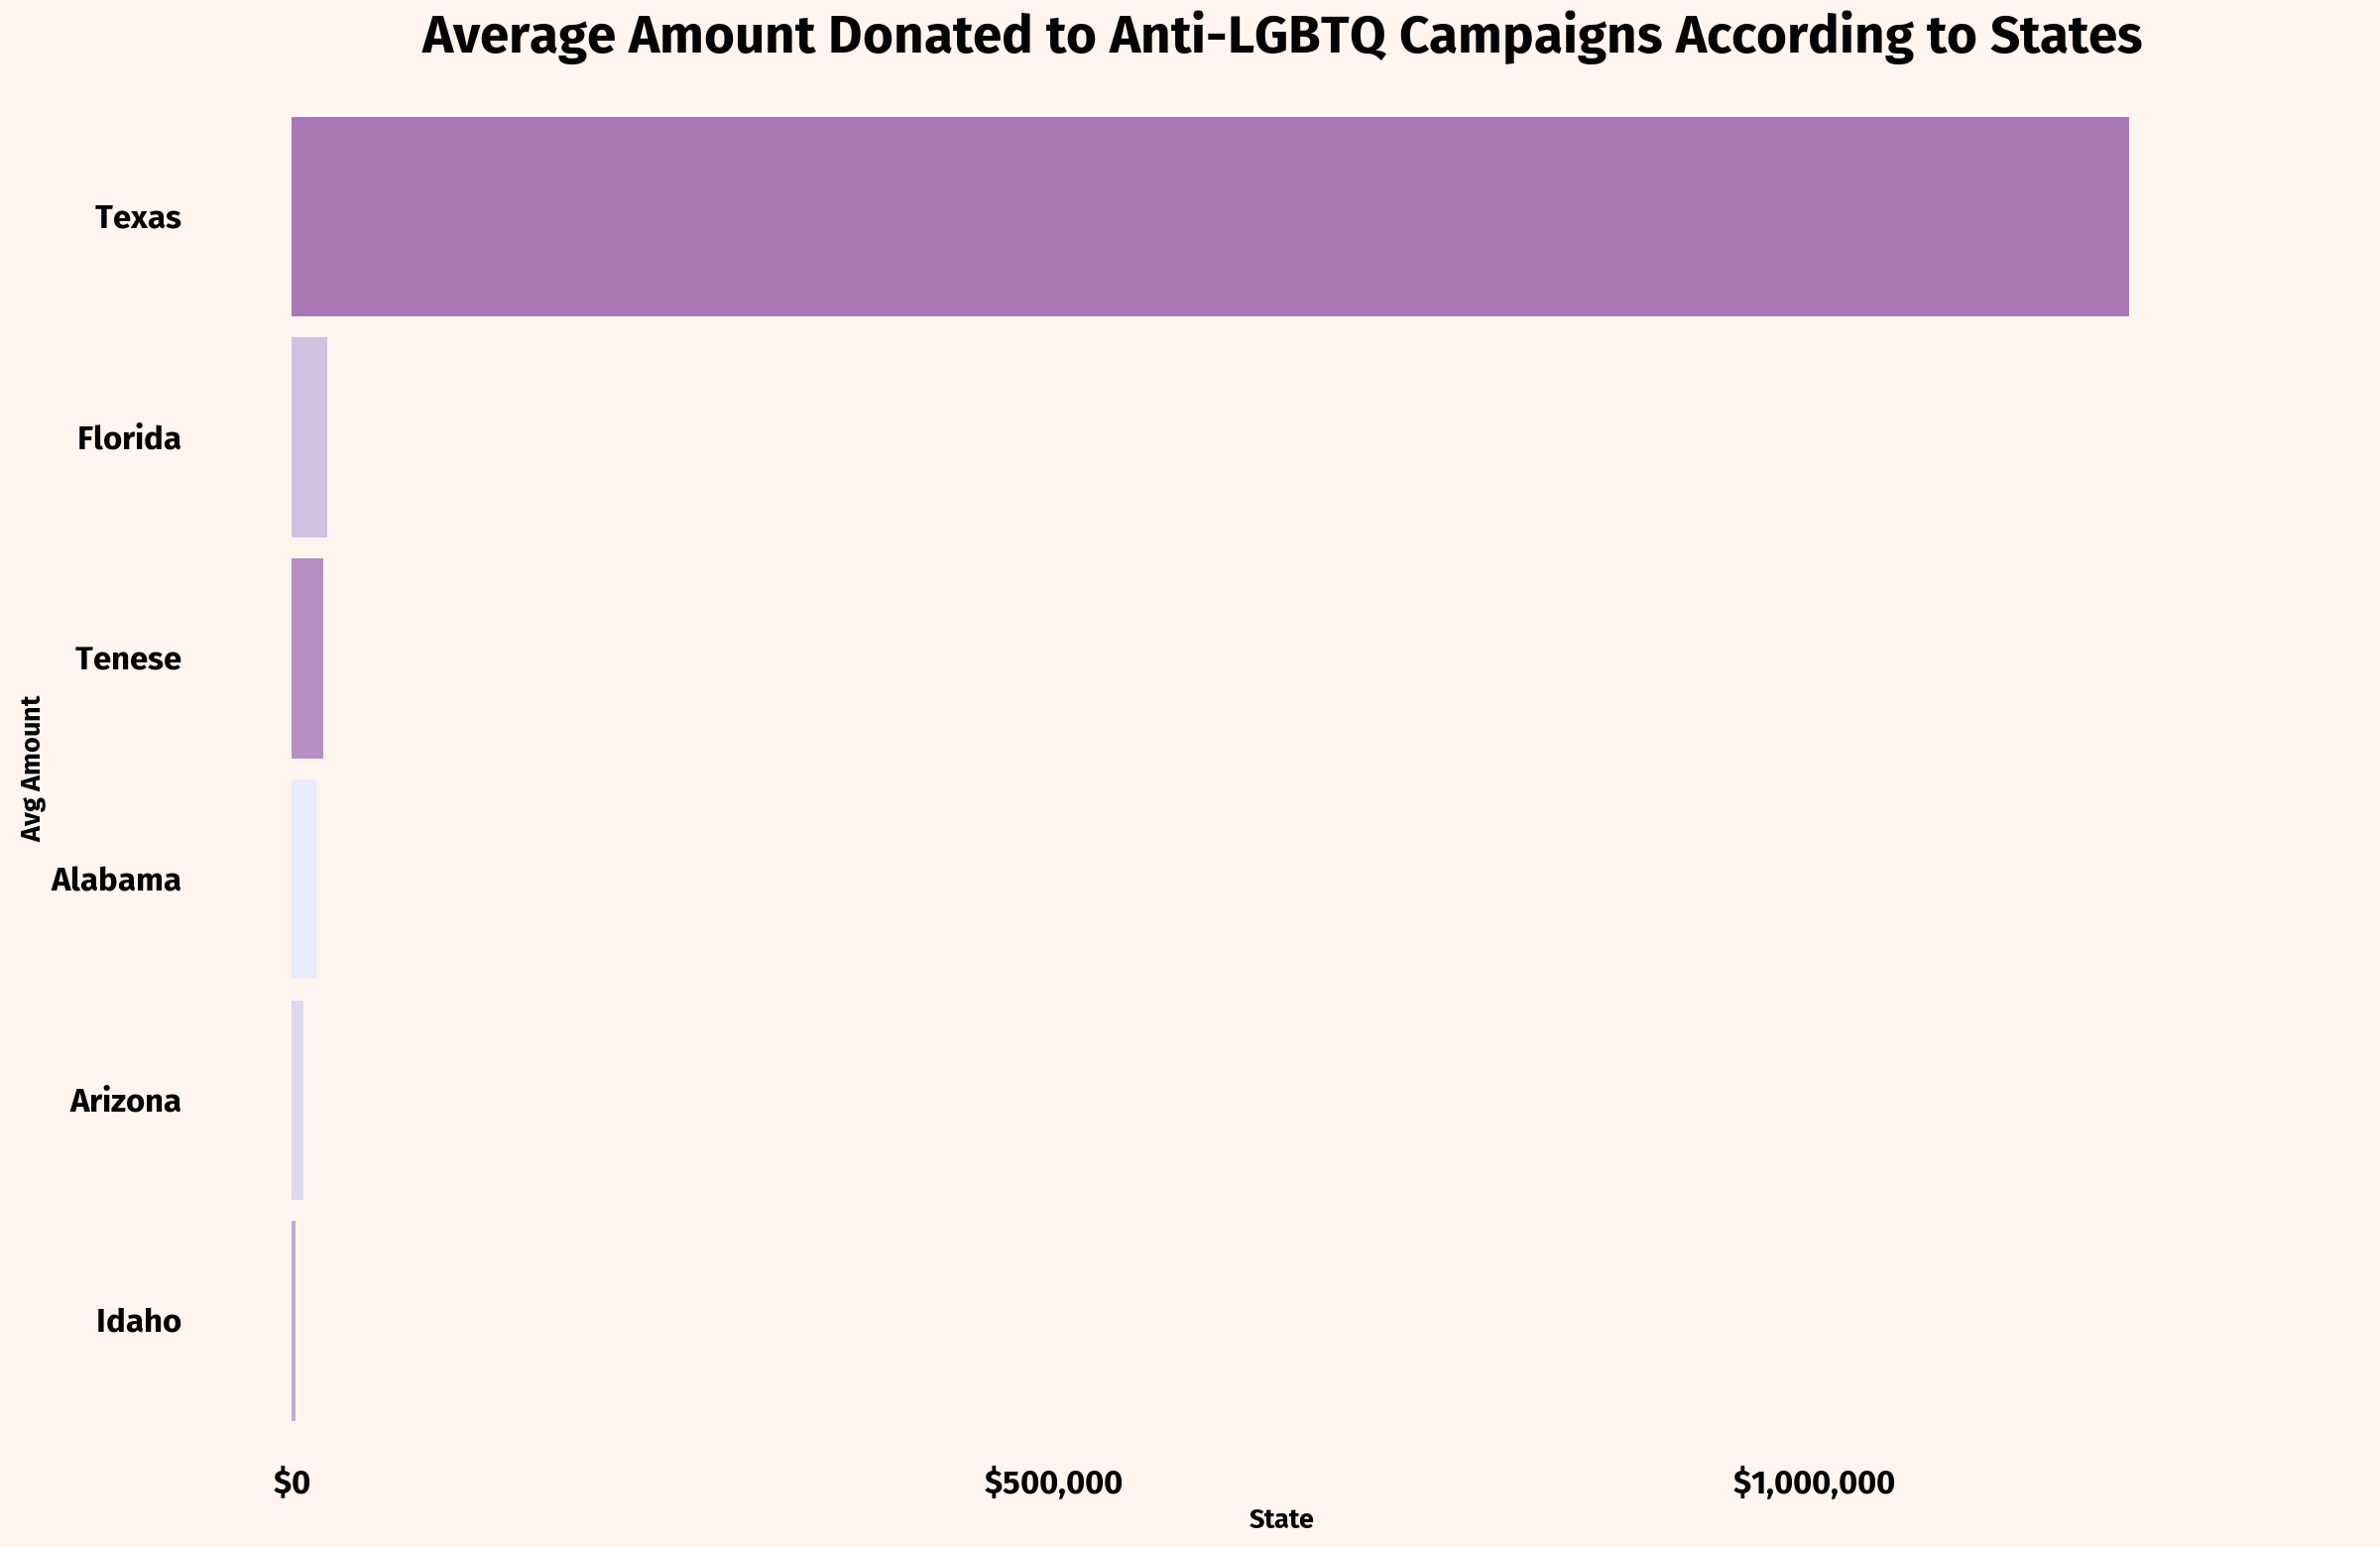

In [25]:
options(repr.plot.width = 20, repr.plot.height =13)

corp %>%
filter(! state == '#N/A')%>%
mutate(state = case_when(state == 'AL' ~ 'Alabama',
                         state == 'AZ' ~ 'Arizona',
                         state == 'FL' ~ 'Florida',
                         state == 'ID' ~ "Idaho",
                         state == 'TN' ~ 'Tenese',
                         state == 'TX' ~ 'Texas'))%>%
group_by(state)%>%
summarise(avg_amount = mean(sum_of_amount))%>%
ggplot(aes(reorder(state, avg_amount),avg_amount,fill = state))+
geom_col()+
scale_fill_paletteer_d("khroma::smooth_rainbow")+
scale_y_continuous(limits = c(0,1300000),
                  labels = scales::dollar)+
coord_flip()+
my_theme()+
labs(title = "Average Amount Donated to Anti-LGBTQ Campaigns According to States",
    x = 'Avg Amount',
    y = 'State')